<a href="https://colab.research.google.com/github/Mudit0110/Stress-Detection-System/blob/main/Stress_Detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stress.csv")
df.head()

,text,label,text_length
0,"He said he had not felt that way before, sugge...",1,571
1,"Hey there r/assistance, Not sure if this is th...",0,588
2,October is Domestic Violence Awareness Month a...,1,533
3,I think he doesn't want to put in the effort f...,1,539
4,It was a big company so luckily I didn't have ...,0,588


In [ ]:
df.shape

(2838, 116)

In [ ]:
print(f"Shape of dataset \n * Rows : {df.shape[0]} \n * columns : {df.shape[1]}")

Shape of dataset 
 * Rows : 2838 
 * columns : 116


In [ ]:
print("Columns in dataset \n\n",df.columns)

Columns in dataset 

 Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)


In [ ]:
print("Total Duplicate Value in dataset: ",df.duplicated().sum())

Total Duplicate Value in dataset:  0


In [ ]:
print("Total Null Values in Dataset :",df.isnull().sum().sum())

Total Null Values in Dataset : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
df.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [ ]:
df["subreddit"].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [ ]:
df["subreddit"].value_counts()

,count
subreddit,
ptsd,584
relationships,552
anxiety,503
domesticviolence,316
assistance,289
survivorsofabuse,245
homeless,168
almosthomeless,80
stress,64


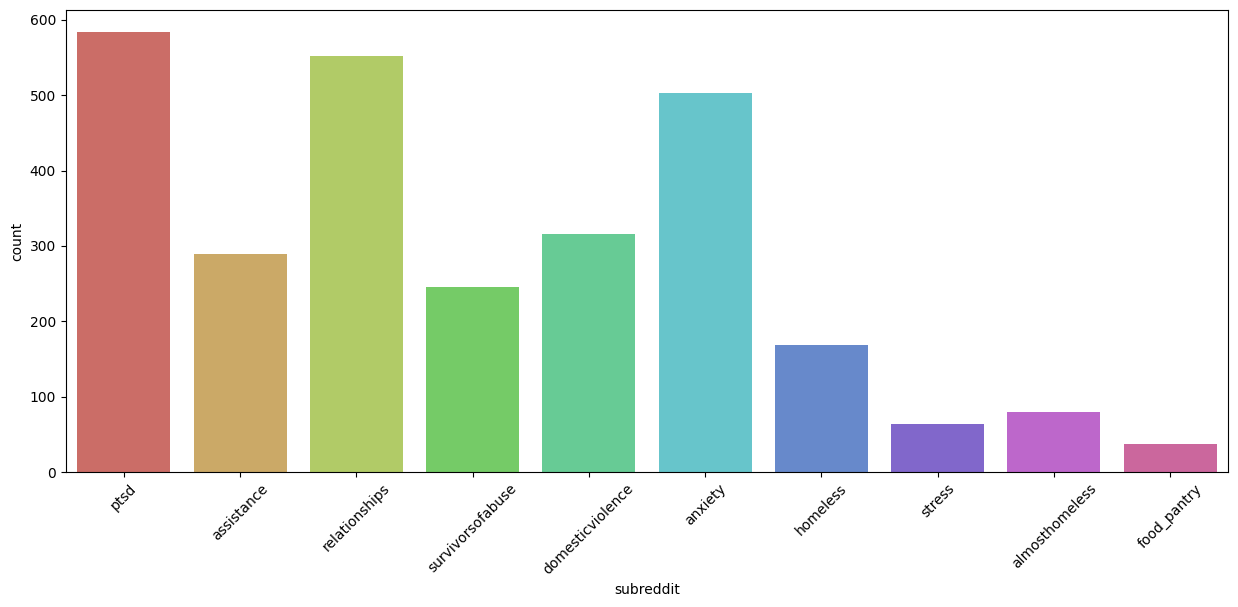

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x="subreddit", data=df, palette="hls")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["label"].unique()

array([1, 0])

In [ ]:
df["label"].value_counts()

,count
label,
1,1488
0,1350


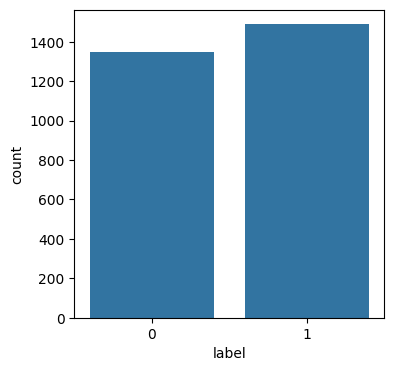

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x="label", data = df)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from string import punctuation
from nltk import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_word = set(stopwords.words("english"))
stemm = SnowballStemmer("english")

In [ ]:
def text_clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop_word]
    text=" ".join(text)
    text = [stemm.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df["text"] = df["text"].apply(text_clean)

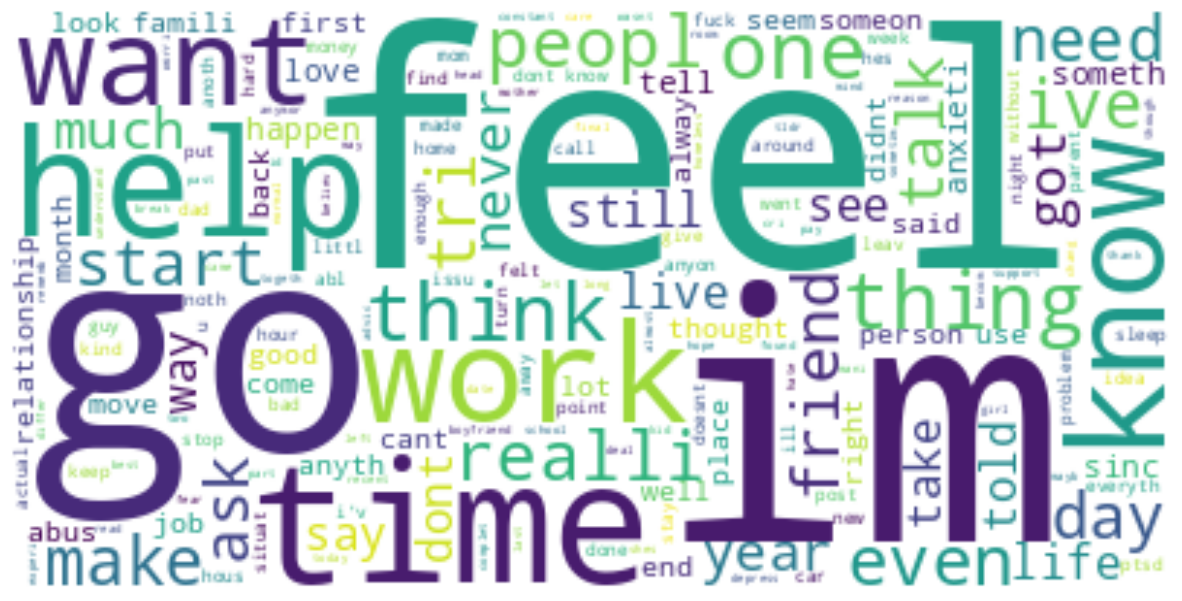

In [ ]:
# Most frequent word in text columns
text = " ".join(i for i in df.text)
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df["label"] = df["label"].map({0:"No Stress", 1:"Stress"})

In [ ]:
final_df = df[["text","label"]]
print(final_df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
# prompt: Now give me the code to save final_df as csv file in drive

final_df.to_csv('/content/drive/MyDrive/final_df.csv', index=False)

In [ ]:
final_df["label"].value_counts()

,count
label,
Stress,1488
No Stress,1350


In [ ]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB


In [ ]:
# first split data into x and y
x = np.array(df["text"])
y = np.array(df["label"])

In [ ]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(x)


In [ ]:
# split into train and test

X_train,X_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=2023)

In [ ]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Random Forest (entropy)": RandomForestClassifier(n_estimators=10, criterion="entropy"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (LinearSVC)": LinearSVC(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print(f"Accuracy on Training set: {model.score(X_train, y_train) * 100:.2f}%")
    print(f"Accuracy on Test set: {model.score(X_test, y_test) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy on Training set: 92.82%
Accuracy on Test set: 87.80%
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1442
           1       0.87      0.90      0.89      1575

    accuracy                           0.88      3017
   macro avg       0.88      0.88      0.88      3017
weighted avg       0.88      0.88      0.88      3017


--- Decision Tree ---
Accuracy on Training set: 100.00%
Accuracy on Test set: 87.47%
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1442
           1       0.88      0.89      0.88      1575

    accuracy                           0.87      3017
   macro avg       0.87      0.87      0.87      3017
weighted avg       0.87      0.87      0.87      3017


--- Random Forest ---
Accuracy o

### Logestic Regression


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Score of model
print(f"score of X_train and y_train : {lr.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {lr.score(X_test,y_test)*100}")

score of X_train and y_train : 92.82364644024442
score of X_test and y_test : 87.80245276764998


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Score of model
print(f"score of X_train and y_train : {dt.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {dt.score(X_test,y_test)*100}")

score of X_train and y_train : 100.0
score of X_test and y_test : 88.00132582035134



### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Score of model
print(f"score of X_train and y_train : {rf.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {rf.score(X_test,y_test)*100}")

score of X_train and y_train : 100.0
score of X_test and y_test : 95.62479284057011


### Random Forest with parameters

In [ ]:
rf1 = RandomForestClassifier(n_estimators=10, criterion="entropy")
rf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
# Score of model
print(f"score of X_train and y_train : {rf1.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {rf1.score(X_test,y_test)*100}")

score of X_train and y_train : 99.8436833878073
score of X_test and y_test : 91.21644017235666


### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Score of model
print(f"score of X_train and y_train : {knn.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {knn.score(X_test,y_test)*100}")

score of X_train and y_train : 93.61944010231633
score of X_test and y_test : 83.39410009943653


SVM

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [ ]:
print(f"Score of X_train and y_train (SVM): {svm.score(X_train, y_train) * 100:.2f}%")
print(f"Score of X_test and y_test (SVM): {svm.score(X_test, y_test) * 100:.2f}%")

Score of X_train and y_train (SVM): 99.84%
Score of X_test and y_test (SVM): 96.72%


Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

print(f"Score of X_train and y_train (Naive Bayes): {nb.score(X_train, y_train) * 100:.2f}%")
print(f"Score of X_test and y_test (Naive Bayes): {nb.score(X_test, y_test) * 100:.2f}%")

Score of X_train and y_train (Naive Bayes): 90.54%
Score of X_test and y_test (Naive Bayes): 85.38%


In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# Score of model
print(f"score of X_train and y_train : {bnb.score(X_train,y_train)*100}")
print(f"score of X_test and y_test : {bnb.score(X_test,y_test)*100}")

score of X_train and y_train : 94.74207758988206
score of X_test and y_test : 90.5203844879019


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def plot_conf_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stress", "Stress"], yticklabels=["No Stress", "Stress"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

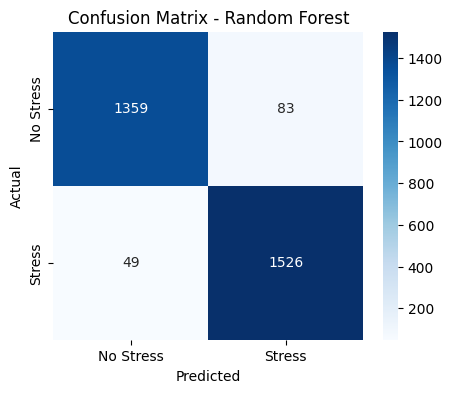

In [ ]:
# Random Forest
plot_conf_matrix(rf, X_test, y_test, "Random Forest")

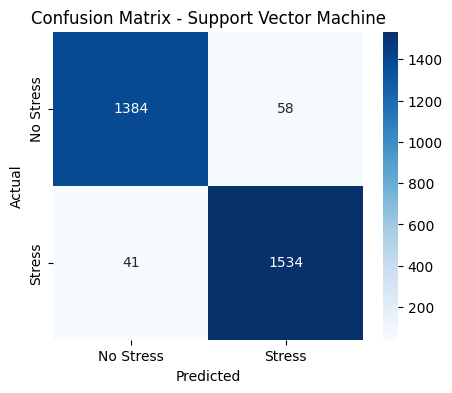

In [ ]:
plot_conf_matrix(svm, X_test, y_test, "Support Vector Machine")

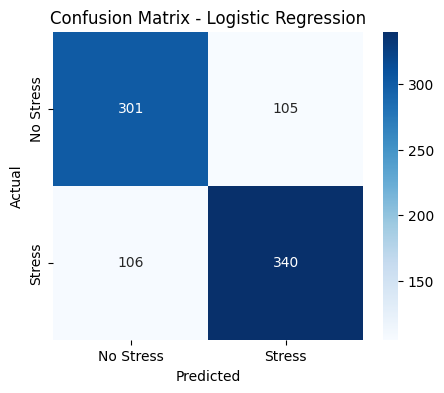

In [ ]:
plot_conf_matrix(lr, X_test, y_test, "Logistic Regression")

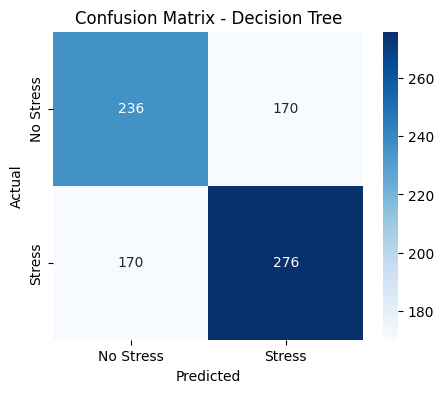

In [ ]:
plot_conf_matrix(dt, X_test, y_test, "Decision Tree")

In [ ]:
# Lets take user input and pass in model

user = input("Enter Text :- ")
data = tfidf.transform([user]).toarray()
output = rf.predict(data)
print(output[0])

Enter Text :- I am not happy
No Stress
